In [43]:
import pandas as pd
dat = pd.read_excel("data/raw/December 2022.xlsx", sheet_name=1)
dat

,Unnamed: 0,NW - I,NC - II,NE - III,SW - IV,SC - V,SE - VI,State Average
0,1,14.2632,14.0200,13.7953,14.3432,14.0775,13.9518,14.0917
1,2,14.3500,14.1000,13.8700,14.3600,14.1600,14.0200,14.1617
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,14.3400,14.1000,13.8700,14.3600,14.1600,13.9900,14.1556
5,6,14.5100,14.2700,14.0200,14.5600,14.3300,14.1600,14.3276
6,7,14.6529,14.4300,14.2222,14.7957,14.5000,14.3557,14.5063
7,8,14.7582,14.5775,14.3247,14.9296,14.6382,14.4711,14.6314
8,9,14.7200,14.5100,14.3100,14.8700,14.6200,14.4200,14.5857
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\MSI\AppData\Local\Temp\ipykernel_25596\2851956694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['State Average'] = pd.to_numeric(selected['State Average'], errors='coerce')


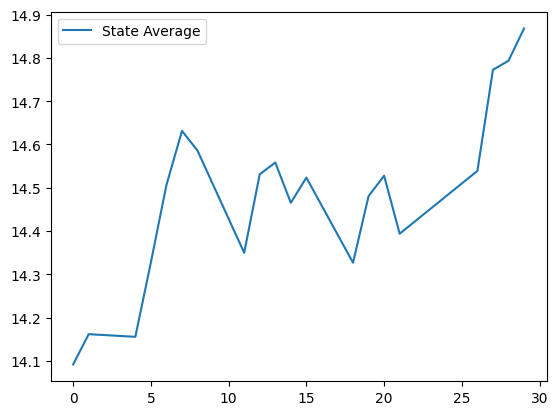

In [45]:
# # Update the column references based on the actual names
selected = dat[['State Average']]

# # # Convert the column to numeric, coercing errors to NaN
selected['State Average'] = pd.to_numeric(selected['State Average'], errors='coerce')

# # # Select only rows up to the 31st row (excluding row 32 and beyond)
selected_data_cleaned = selected.iloc[:31].dropna()

# # # Plot the cleaned data
selected_data_cleaned.plot()

selected_data_cleaned.to_excel("data/processed/12_bean_22.xlsx", index=False)


In [47]:
import pandas as pd

file_paths = [
    'data/processed/2023/1_corn_23.xlsx', 'data/processed/2023/2_corn_23.xlsx', 'data/processed/2023/3_corn_23.xlsx'
]

cleaned_data = pd.DataFrame()

for file_path in file_paths:
    df = pd.read_excel(file_path)
    
    # 열 이름 확인 및 올바른 열 선택
    if 'State\nAverage' in df.columns:
        price_column = 'State\nAverage'
    elif 'State Average' in df.columns:
        price_column = 'State Average'
    else:
        continue  # 해당 열이 없는 경우, 다음 파일로 넘어감

    df['Price'] = df[price_column]
    # 파일명에서 월 추출 (예: '1_corn_23.xlsx' -> '1')
    df['Month'] = file_path.split('/')[3].split('_')[0]
    df = df[['Price', 'Month']]
    cleaned_data = pd.concat([cleaned_data, df], ignore_index=True)

cleaned_data.dropna(subset=['Price'], inplace=True)
pd.set_option('display.max_rows', None)
print(cleaned_data)


KeyError: ['Price']

In [14]:
cleaned_data.to_csv("1to3_actual_corn.csv", index=False)

In [49]:
import pandas as pd

# File paths
file_paths = [
    'data/processed/1_bean_22.xlsx', 'data/processed/2_bean_22.xlsx', 'data/processed/3_bean_22.xlsx', 'data/processed/4_bean_22.xlsx', 'data/processed/5_bean_22.xlsx',
    'data/processed/6_bean_22.xlsx', 'data/processed/7_bean_22.xlsx', 'data/processed/8_bean_22.xlsx', 'data/processed/9_bean_22.xlsx', 'data/processed/10_bean_22.xlsx',
    'data/processed/11_bean_22.xlsx', 'data/processed/12_bean_22.xlsx',
]

cleaned_data = pd.DataFrame()

for file_path in file_paths:
    df = pd.read_excel(file_path)
    
    # 열 이름 확인 및 올바른 열 선택
    if 'State\nAverage' in df.columns:
        price_column = 'State\nAverage'
    elif 'State Average' in df.columns:
        price_column = 'State Average'
    else:
        continue  # 해당 열이 없는 경우, 다음 파일로 넘어감

    df['Price'] = df[price_column]
    df['Month'] = file_path.split('/')[2].split('_')[0]
    df = df[['Price', 'Month']]
    cleaned_data = pd.concat([cleaned_data, df], ignore_index=True)

cleaned_data.dropna(subset=['Price'], inplace=True)
pd.set_option('display.max_rows', None)
print(cleaned_data)

       Price Month
0    13.0389     1
1    13.3738     1
2    13.4361     1
3    13.3596     1
4    13.5789     1
5    13.3243     1
6    13.3224     1
7    13.4472     1
8    13.2270     1
9    13.1381     1
10   13.0640     1
11   13.3560     1
12   13.6973     1
13   13.5756     1
14   13.4649     1
15   13.5172     1
16   13.8186     1
17   13.9013     1
18   14.1085     1
19   14.3094     1
20   14.6693     2
21   14.8416     2
22   14.8351     2
23   14.9215     2
24   15.1897     2
25   15.0698     2
26   15.3239     2
27   15.1182     2
28   15.2122     2
29   15.0855     2
30   14.8944     2
31   15.2645     2
32   15.3081     2
33   15.4071     2
34   15.7366     2
35   16.1181     2
36   15.9039     2
37   15.1929     2
38   15.7095     2
39   16.2645     3
40   15.9690     3
41   15.9228     3
42   15.8588     3
43   15.6954     3
44   15.9428     3
45   15.7975     3
46   15.9648     3
47   15.8590     3
48   15.7982     3
49   15.6926     3
50   15.5372     3
51   15.7941

In [51]:
cleaned_data.to_csv("data/merged_bean_22.csv", index=False)